# Clustering (군집화)
- data from 전력거래소
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### data read

In [ ]:
!curl -L "https://goo.gl/Cx8Rzw" -o power_data.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   184    0   184    0     0    303      0 --:--:-- --:--:-- --:--:--   303
100   318  100   318    0     0    400      0 --:--:-- --:--:-- --:--:--   400
100  1076    0  1076    0     0   1067      0 --:--:--  0:00:01 --:--:--     0
100 17920  100 17920    0     0  14761      0  0:00:01  0:00:01 --:--:-- 14761


In [ ]:
df = pd.read_excel('power_data.xls')
df.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [ ]:
print(df.columns)
print(df.index)

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')
RangeIndex(start=0, stop=19, step=1)


In [ ]:
df.shape

(19, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      19 non-null     object
 1   주거용     19 non-null     int64 
 2   공공용     19 non-null     int64 
 3   서비스업    19 non-null     int64 
 4   업무용합계   19 non-null     int64 
 5   농림어업    19 non-null     int64 
 6   광업      19 non-null     int64 
 7   제조업     19 non-null     int64 
 8   식료품제조   19 non-null     int64 
 9   섬유,의류   19 non-null     int64 
 10  목재,나무   19 non-null     int64 
 11  펄프,종이   19 non-null     int64 
 12  출판,인쇄   19 non-null     int64 
 13  석유,화확   19 non-null     int64 
 14  의료,광학   19 non-null     int64 
 15  요업      19 non-null     int64 
 16  1차금속    19 non-null     int64 
 17  조립금속    19 non-null     int64 
 18  기타기계    19 non-null     int64 
 19  사무기기    19 non-null     int64 
 20  전기기기    19 non-null     int64 
 21  영상,음향   19 non-null     int64 
 22  자동차     19 non-null     int6

In [ ]:
df.tail()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
14,전북,2326183,1096968,4910318,6007286,1415004,85300,12965875,1459217,731651,291729,1282937,10512,4452120,64088,614013,2158438,137635,159699,7240,130692,420005,859741,70980,16175,99003,14466179,22799647
15,제주,782601,301727,2308732,2610459,1364930,14019,241537,155987,3497,1524,20864,2436,19615,5038,22521,993,3331,1167,0,771,0,773,532,1743,743,1620486,5013545
16,충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,134109,809760,50869,7787274,771894,914757,9976454,565003,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334,50180209
17,충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,51682,880020,23940,2350133,587361,2431846,469546,738699,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435,24843494
18,합계,64576423,22204112,134748546,156952658,15373994,1347957,252942540,10735833,11247578,1905882,8362019,1389566,60293807,5847599,8916474,44290363,9483924,10504640,487262,5763846,47655808,17790147,4311878,3396006,559909,269664491,491193571


In [ ]:
df.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,6.899673e+06,2.410981e+06,1.451057e+07,1.692155e+07,1.650270e+06,1.628526e+05,2.694144e+07,1.158857e+06,1.184641e+06,2.016269e+05,8.814958e+05,1.466768e+05,6.355944e+06,6.199787e+05,1.133091e+06,4.716823e+06,1.000385e+06,1.107597e+06,51397.000000,6.087239e+05,5.018716e+06,1.878618e+06,4.595993e+05,3.581517e+05,59117.789474,2.875456e+07,5.257579e+07
std,1.457381e+07,4.957221e+06,3.031208e+07,3.526148e+07,3.464035e+06,3.102484e+05,5.669154e+07,2.399623e+06,2.604338e+06,4.514169e+05,1.881775e+06,3.464340e+05,1.382194e+07,1.390488e+06,2.123939e+06,1.011038e+07,2.145323e+06,2.437518e+06,127516.047494,1.300814e+06,1.190370e+07,3.981244e+06,1.058183e+06,8.481672e+05,126709.246048,6.037040e+07,1.092609e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.906912e+06,6.959615e+05,3.802654e+06,4.524926e+06,7.203850e+04,9.938500e+03,2.759556e+06,1.959545e+05,7.325600e+04,5.590500e+03,4.255400e+04,7.220500e+03,3.390540e+05,3.830050e+04,6.080900e+04,6.611850e+04,6.701200e+04,7.220050e+04,3672.000000,6.083550e+04,4.510550e+04,9.622850e+04,1.154750e+04,1.313200e+04,2739.000000,2.814293e+06,1.240509e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,7.152900e+04,1.236782e+07,5.329430e+05,3.338460e+05,2.799800e+04,3.617720e+05,2.394000e+04,1.865583e+06,8.439700e+04,3.058480e+05,2.020196e+06,3.934690e+05,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,4.058920e+06,1.413990e+06,8.034786e+06,9.476781e+06,1.837764e+06,1.822120e+05,2.366853e+07,1.034889e+06,8.374750e+05,1.033945e+05,8.137225e+05,4.883650e+04,5.666948e+06,4.025660e+05,1.092337e+06,4.240276e+06,8.118030e+05,8.433595e+05,14393.500000,5.898460e+05,2.614198e+06,2.256474e+06,1.775380e+05,1.976150e+05,46850.000000,2.530336e+07,4.005174e+07
max,6.457642e+07,2.220411e+07,1.347485e+08,1.569527e+08,1.537399e+07,1.347957e+06,2.529425e+08,1.073583e+07,1.124758e+07,1.905882e+06,8.362019e+06,1.389566e+06,6.029381e+07,5.847599e+06,8.916474e+06,4.429036e+07,9.483924e+06,1.050464e+07,487262.000000,5.763846e+06,4.765581e+07,1.779015e+07,4.311878e+06,3.396006e+06,559909.000000,2.696645e+08,4.911936e+08


In [ ]:
df = df.set_index('구분')
df = df.drop(['합계', '개성'], errors='ignore')
df.shape

(17, 27)

In [ ]:
df.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649


### Fonts for Korean Letters (한글폰트) 

In [ ]:
# Colab 에서 한글 폰트 설정 - 설중 후에 꼭 다시 runtime restart 해 주어야 함
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# '-' 기호 보이게 하기
import platform
import matplotlib
from matplotlib import font_manager, rc
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [ ]:
df.head(2)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859


In [ ]:
df = df.drop("합계",axis=1)

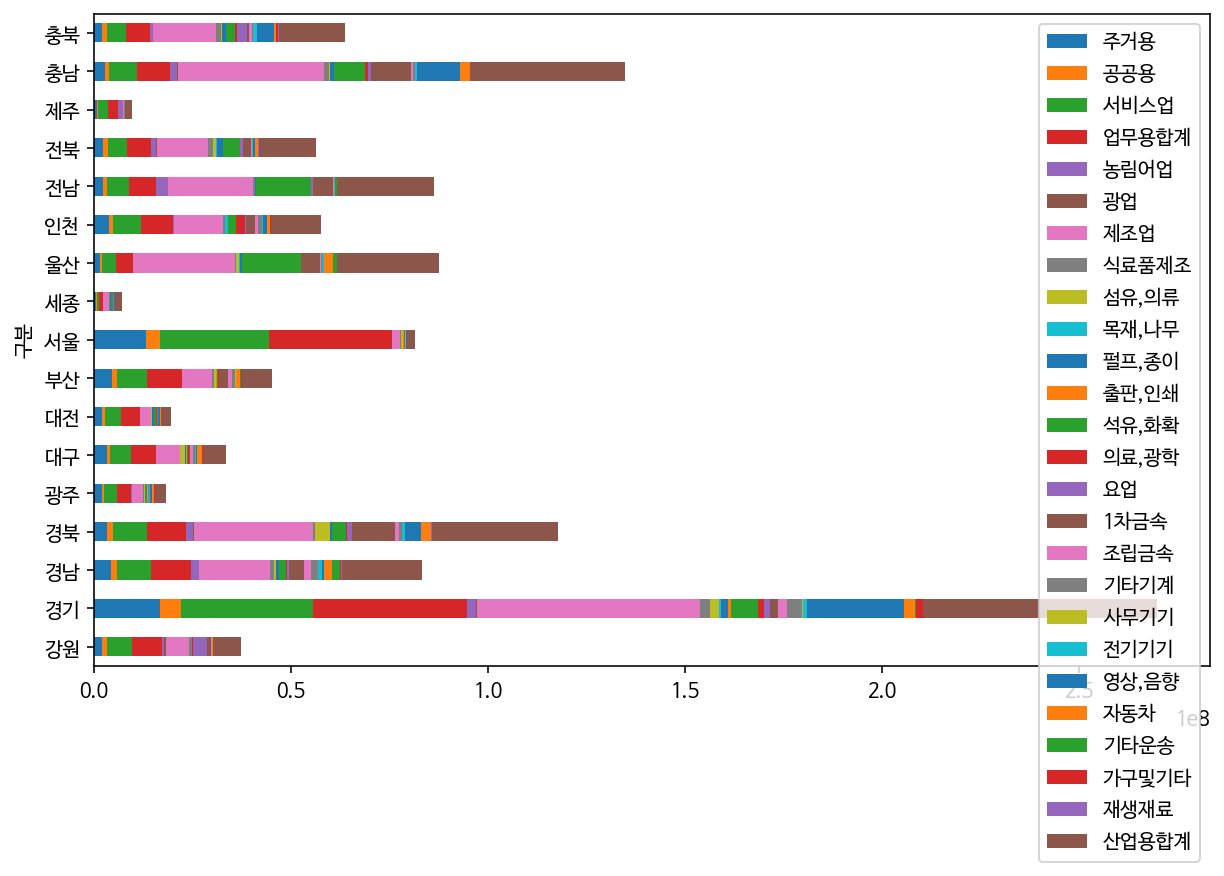

In [ ]:
df.plot(kind='barh', figsize=(10,6), stacked=True)

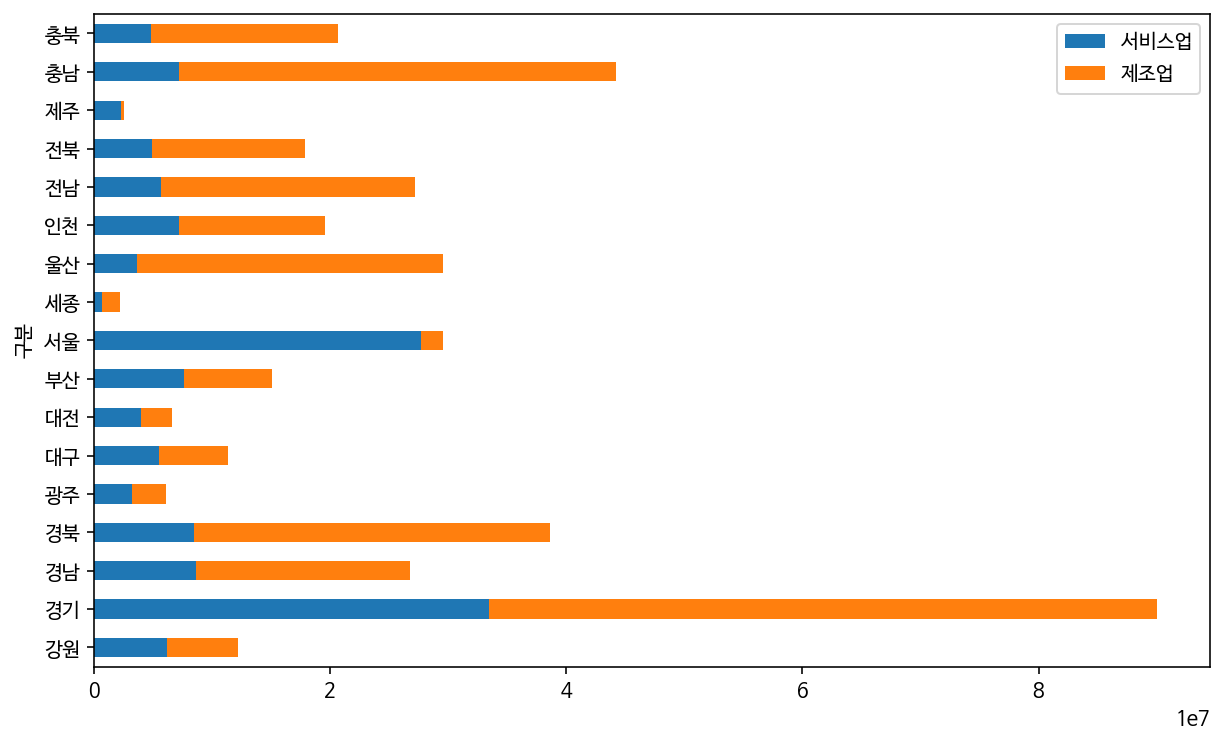

In [ ]:
see_c = ['서비스업','제조업']
df[see_c].plot(kind='barh', figsize=(10,6), stacked=True)

In [ ]:
df2 = df[see_c]
df2.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


### scatter plot

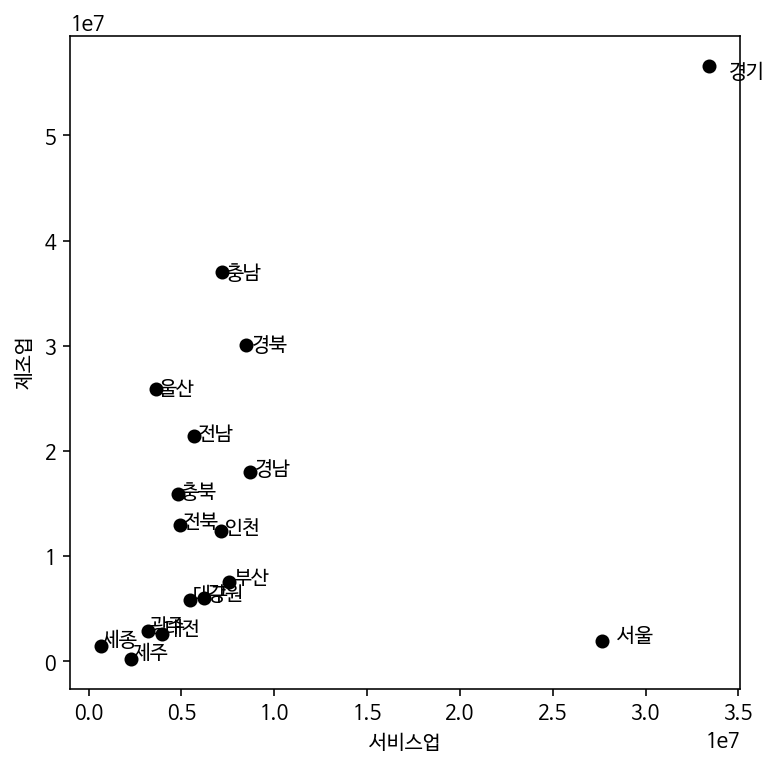

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df2['서비스업'], df2['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])

In [ ]:
df2 = df2.drop(['경기', '서울'])
df2.shape

(15, 2)

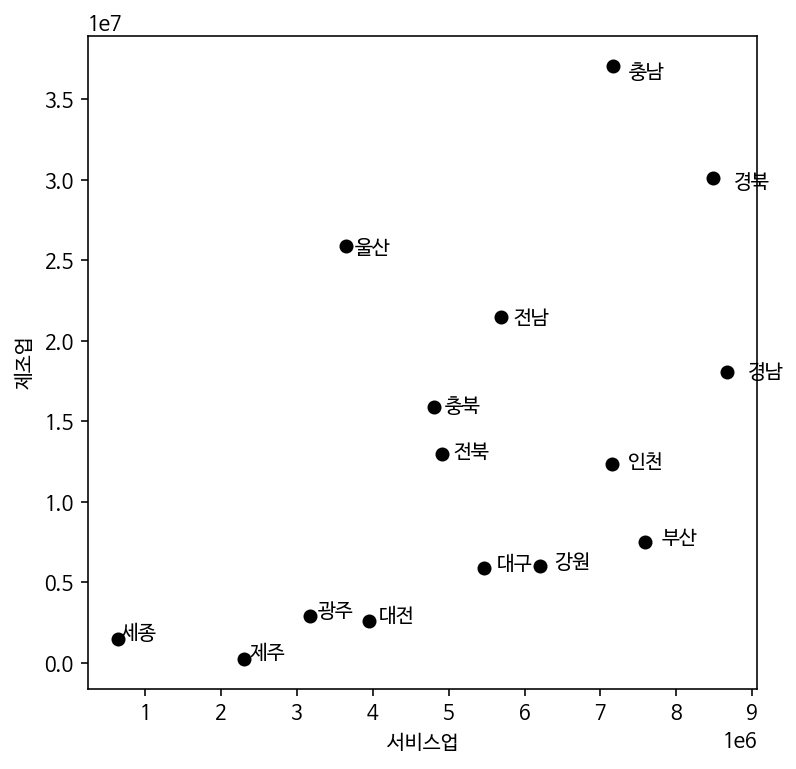

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df2['서비스업'], df2['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])

### Agglomerative clustering (Hierarchical) and Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(df2, metric='euclidean', method='centroid')
link_dist

array([[0.00000000e+00, 4.00000000e+00, 7.46490444e+05, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 8.37460840e+05, 2.00000000e+00],
       [7.00000000e+00, 1.20000000e+01, 2.08750703e+06, 2.00000000e+00],
       [9.00000000e+00, 1.10000000e+01, 2.32242339e+06, 2.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 2.35416537e+06, 3.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 2.81483295e+06, 4.00000000e+00],
       [1.40000000e+01, 1.80000000e+01, 3.44294208e+06, 3.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 4.51929196e+06, 2.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 6.06223563e+06, 7.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 6.21282975e+06, 5.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 6.42807846e+06, 2.00000000e+00],
       [1.30000000e+01, 2.50000000e+01, 9.12465562e+06, 3.00000000e+00],
       [2.30000000e+01, 2.40000000e+01, 1.25088770e+07, 1.20000000e+01],
       [2.60000000e+01, 2.70000000e+01, 2.21152298e

<Figure size 720x360 with 0 Axes>

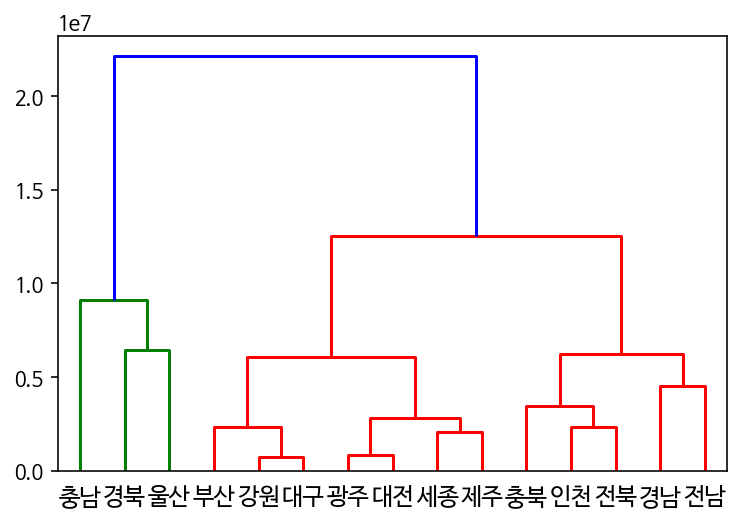

In [ ]:
# method = ward, median, centroid, average, weightd, complete, single
dendrogram(link_dist, labels=list(df2.index))
plt.show()

### KMeans
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3).fit(df2)
print(km.n_clusters)

3


In [ ]:
km.labels_, km.cluster_centers_

(array([0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2], dtype=int32),
 array([[ 4191629.42857143,  3805868.14285714],
        [ 6433742.33333333, 31018896.        ],
        [ 6245553.6       , 16144968.6       ]]))

In [ ]:
km_labels_two = km.labels_       # for compare later on

In [ ]:
df2['클러스터'] = km.labels_
df2

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,2
경북,8487402,30115601,1
광주,3174973,2910768,0
대구,5470438,5862633,0
대전,3955921,2608343,0
부산,7582169,7512588,0
세종,645424,1502922,0
울산,3649386,25883132,1


In [ ]:
df2.drop('클러스터', axis = 1, inplace=True) ; df2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [ ]:
centers = km.cluster_centers_ ; centers

array([[ 4191629.42857143,  3805868.14285714],
       [ 6433742.33333333, 31018896.        ],
       [ 6245553.6       , 16144968.6       ]])

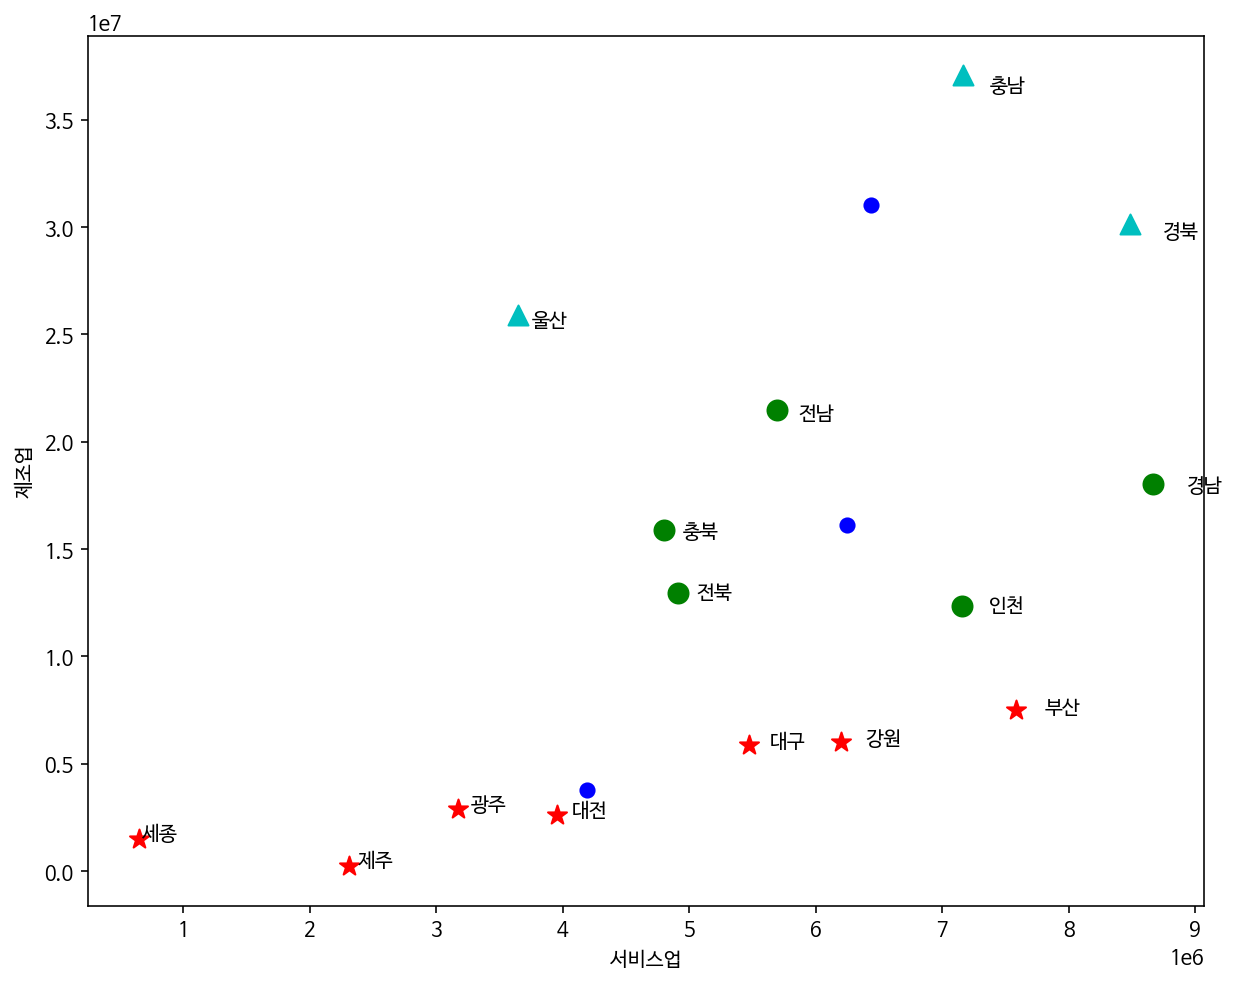

In [ ]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'b', s= 50)

### Scaling (don't forget !)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['서비스업', '제조업']] = scaler.fit_transform(df2[['서비스업', '제조업']])
df2.head(3)

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632


### Clustering after Scaling

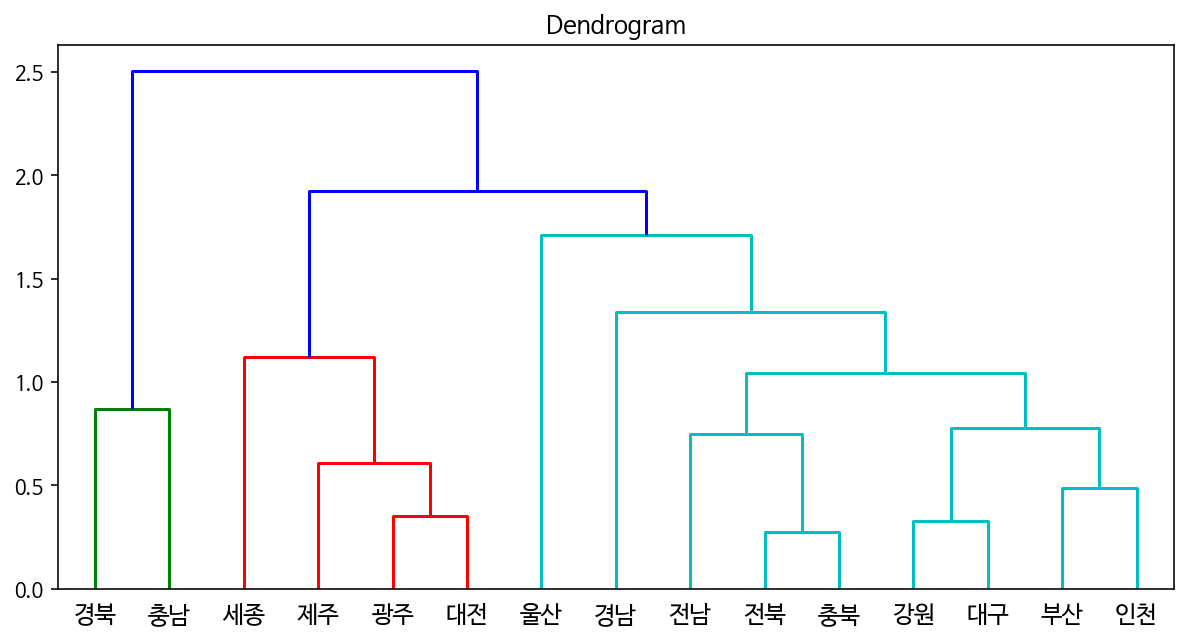

In [ ]:
Z = linkage(df2, metric='euclidean', method='centroid')
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
dendrogram(Z, labels=df2.index)
plt.show()

In [ ]:
km = KMeans(n_clusters= 3).fit(df2)

In [ ]:
centers = km.cluster_centers_
km_labels_two_scaled = km.labels_        # for compare later on

<Figure size 432x288 with 0 Axes>

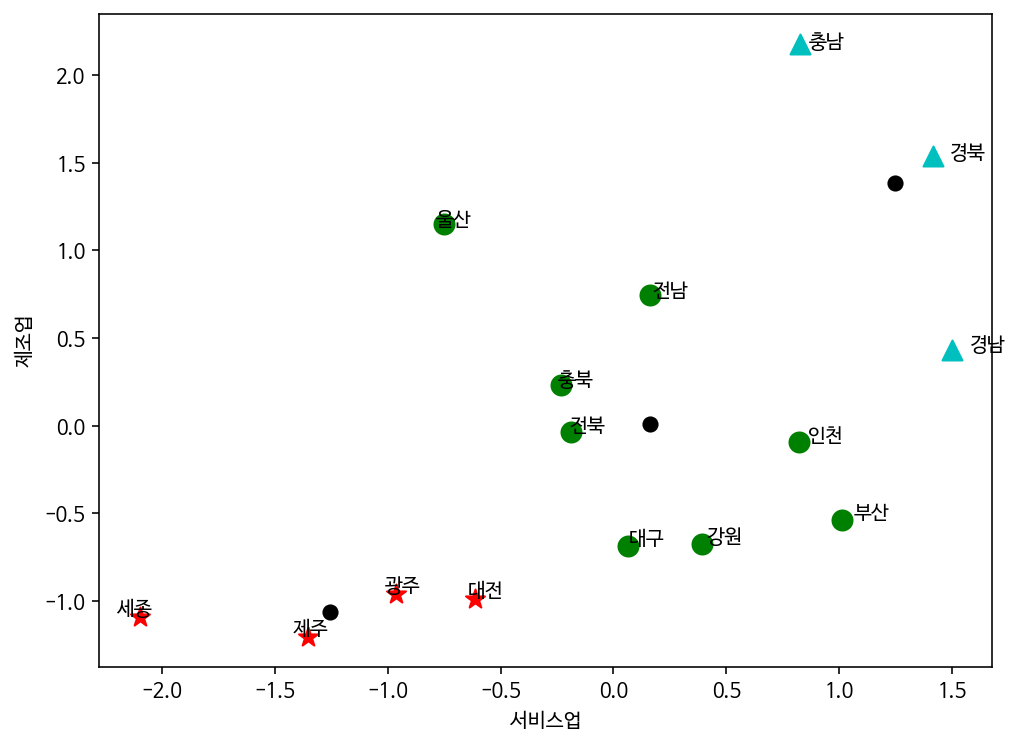

In [ ]:
plt.clf()
plt.figure(figsize=(8, 6))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.05, df2['제조업'][n]*0.99, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'k', s= 50)

### Let's use all features for clustering (instead of two)

In [ ]:
df.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274


In [ ]:
df.drop(['업무용합계', '산업용합계', '합계'], axis=1, inplace=True, errors='ignore')
df.drop(['경기','서울'], inplace=True,errors='ignore')

In [ ]:
df.head()

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,46804,418485,85871,68137,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616


In [ ]:
index_ = df.index
column_ = df.columns

In [ ]:
index_

Index(['강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북',
       '제주', '충남', '충북'],
      dtype='object', name='구분')

In [ ]:
column_

Index(['주거용', '공공용', '서비스업', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류', '목재,나무',
       '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속', '기타기계',
       '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료'],
      dtype='object')

In [ ]:
type(column_)

pandas.core.indexes.base.Index

In [ ]:
list(column_)

['주거용',
 '공공용',
 '서비스업',
 '농림어업',
 '광업',
 '제조업',
 '식료품제조',
 '섬유,의류',
 '목재,나무',
 '펄프,종이',
 '출판,인쇄',
 '석유,화확',
 '의료,광학',
 '요업',
 '1차금속',
 '조립금속',
 '기타기계',
 '사무기기',
 '전기기기',
 '영상,음향',
 '자동차',
 '기타운송',
 '가구및기타',
 '재생재료']

In [ ]:
list(column_).index('제조업'), list(column_).index('서비스업')

(5, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)    # returns an array (not dataframe)

In [ ]:
print(type(df), type(df_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


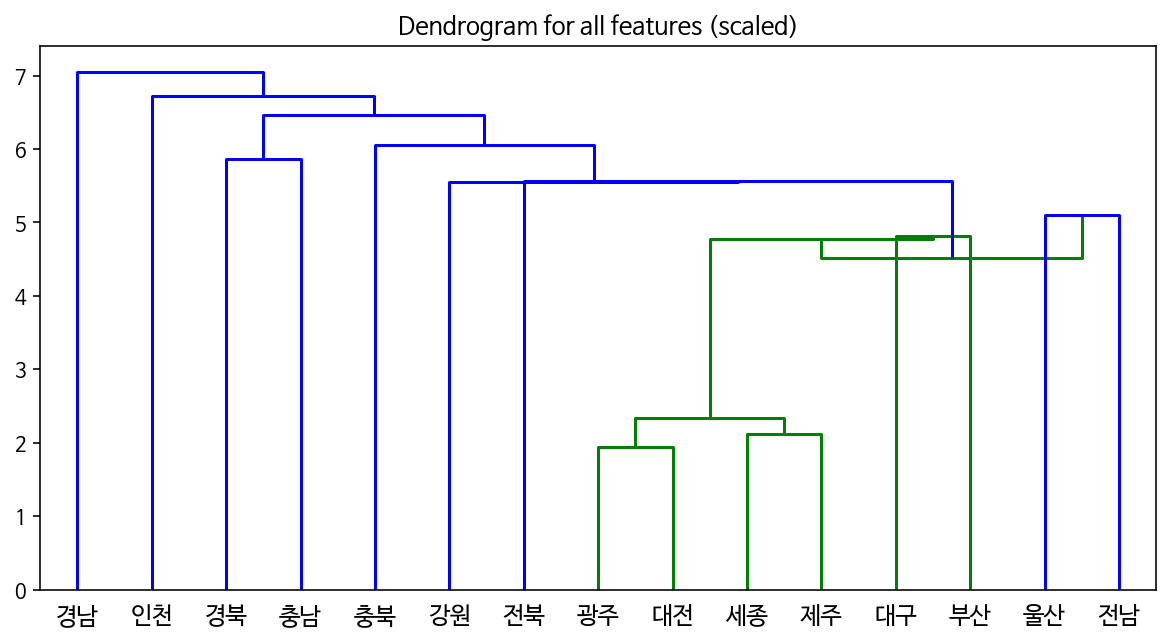

In [ ]:
Z = linkage(df_scaled, metric='euclidean', method='centroid')
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for all features (scaled)')
dendrogram(Z, labels=index_)   # version 에 따라 list(index_) 로 해야 할 수도 있음
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(df_scaled)
print(km.cluster_centers_)
print(km.labels_)

[[ 0.62355929  0.29991628  0.29567798 -0.43863766 -0.26610003 -0.22450484
   0.56307624 -0.03434149  0.7203033   0.29123658  0.61595939 -0.34182469
   0.55058859 -0.04864179 -0.39641909  0.33624605  0.25359254  0.65471259
   0.08270285 -0.12101068 -0.10313761 -0.34966534  0.66890455  0.57831047]
 [ 0.84303539  1.01732643  1.24681469  1.09142754  0.85567359  1.38281262
   0.75471995  0.97169617 -0.0231458   0.62012258  0.822395    0.1868858
   0.15404283  0.1465468   1.57519337  1.2762759   1.29264761  0.02910641
   1.14583779  1.29438622  1.50037953  0.83199499  0.19581729  0.69505906]
 [-0.80670038 -0.65022296 -0.74554771 -0.15444205 -0.1766458  -0.43227338
  -0.72564872 -0.39191158 -0.50458273 -0.47379294 -0.79242599  0.16406657
  -0.45929592 -0.02806164 -0.39192638 -0.78715114 -0.73512937 -0.48012602
  -0.5501468  -0.46830075 -0.56935008 -0.10680832 -0.56171066 -0.71096136]]
[2 1 1 2 0 2 0 2 2 0 2 0 2 1 0]


In [ ]:
print("all features, scaled: ", km.labels_)
print("two features:         ", km_labels_two)
print("two features, scaled: ", km_labels_two_scaled)

all features, scaled:  [2 1 1 2 0 2 0 2 2 0 2 0 2 1 0]
two features:          [0 2 1 0 0 0 0 0 1 2 2 2 0 1 2]
two features, scaled:  [2 1 1 0 2 0 2 0 2 2 2 2 0 1 2]


## DBSCAN(eps=, min_samples=,metric=) 
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
- metric: The metric to use when calculating distance between instances in a feature array. 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.1, random_state=11)   # X :samples, y: label

X[:5],y[:5]

(array([[ 0.07466556, -0.13809597],
        [-0.96718677,  0.77131154],
        [-0.211739  ,  1.01774394],
        [ 1.22822953, -0.34209166],
        [ 0.99307628,  0.13267972]]), array([1, 0, 0, 1, 0]))

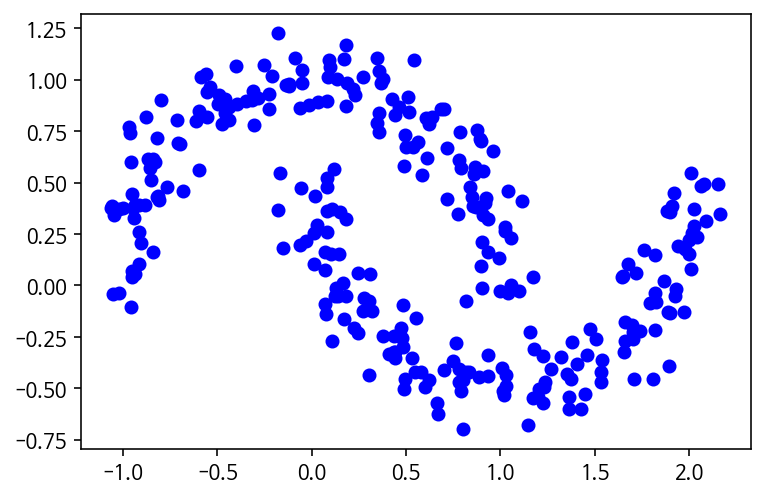

In [ ]:
plt.scatter(X[:,0], X[:,1], c='b')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)   # returns a predicted array

predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], d

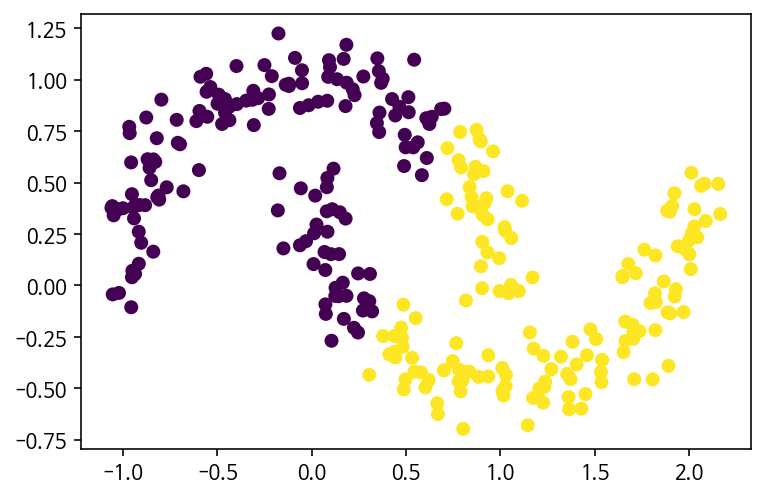

In [ ]:
plt.scatter(X[:,0], X[:,1],c=predict)

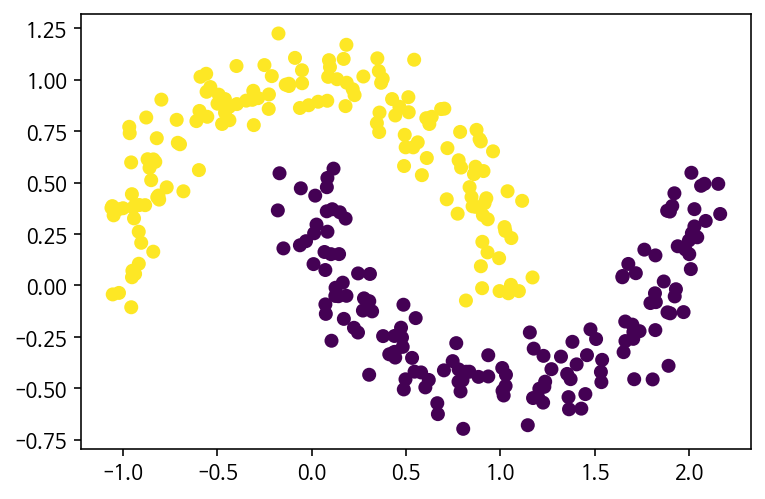

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [ ]:
predict

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

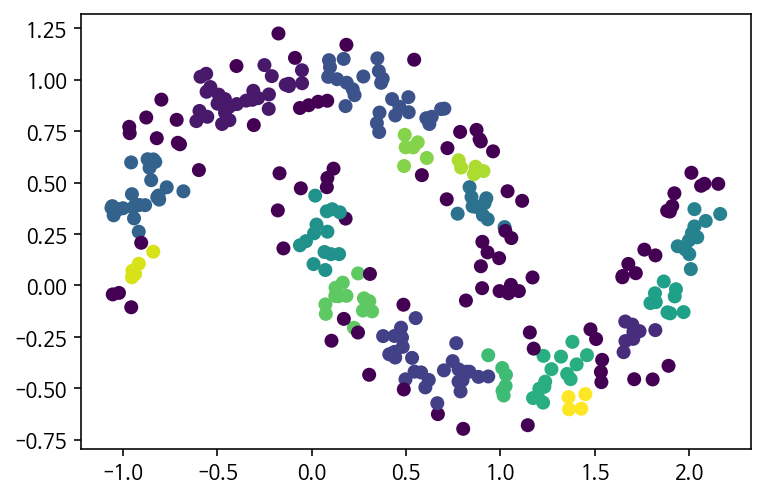

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [ ]:
set(predict)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

[11 -1  0  9 -1 -1  1 12  2  3 -1 -1  4  2 -1  2  4  2  3  5  6 -1 -1  7
  6  4  5  8 -1 -1  6  7  3  5  3  5 -1 10  2 -1  0  9  7 -1  8 -1  0  3
  2  3  2  4 -1  4  3 -1  7  7 -1  3 10  3  2 -1  1 -1 -1 -1  4  5  0  0
  1  3 -1 -1 11 11  0 -1  1 13 -1  5 -1  9 -1  5 -1 12 10 -1  5 -1 -1 -1
  4  9 11 13  9 -1  3  4  2  3  3  9  9 -1 14 -1 -1  0  4  0  0 14  2  0
 -1 -1 -1  3  2  0 -1 -1  8 -1 -1 12  2  4 13 -1  3 -1  9  7  8  4 10 14
  3  9 11  0  2 -1 -1  2 -1 15  7 13 -1  0  0 15  4  1 -1  9  0  2  1  7
  2  2  2  6  9 -1  3 -1  2  6  1  0  6  8 -1  2  2  2  3  0  2 -1 -1 -1
  7 -1 -1  2 11 -1 -1  0 -1  6 15  3 11 14 -1  4  0  2 -1  4  4  6 11 12
 10  8  0  3  0 15  9 -1  3  4  0  8  4  6  2 -1 12  7 -1 -1  3  8  3  5
  3 -1 -1  7  0  4 -1  5  0  7 -1  3  3  2  2  4  4 -1 11 10 -1 11  4  2
 -1  7  1 -1  9 -1  4  0 13  0 -1 -1 -1  9 11  3  4  6 -1 -1 12 14 -1 -1
 -1 -1 11 -1 -1  6 -1  7  8  0  0 11]


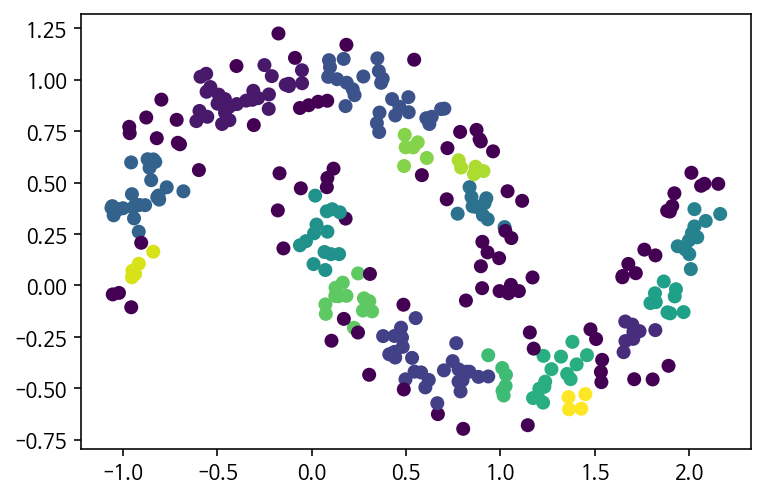

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
print(predict)
plt.scatter(X[:,0], X[:,1],c=predict)

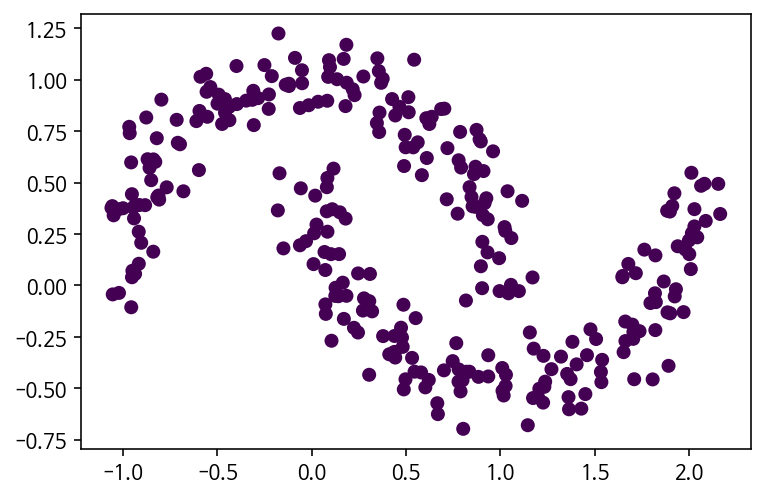

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

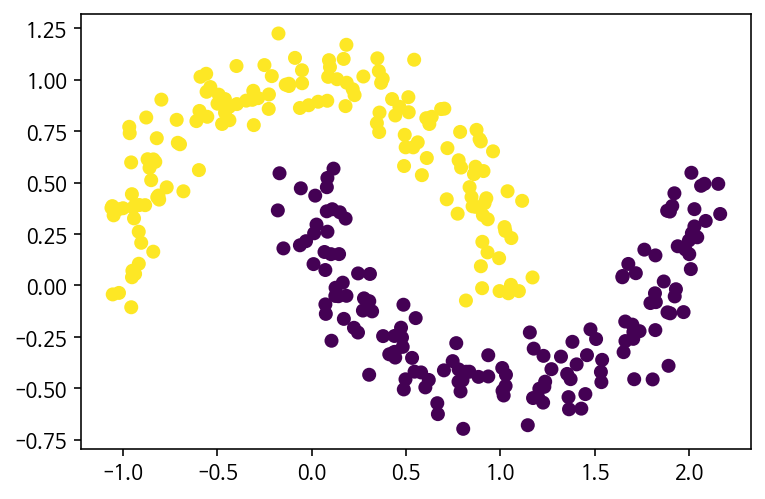

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

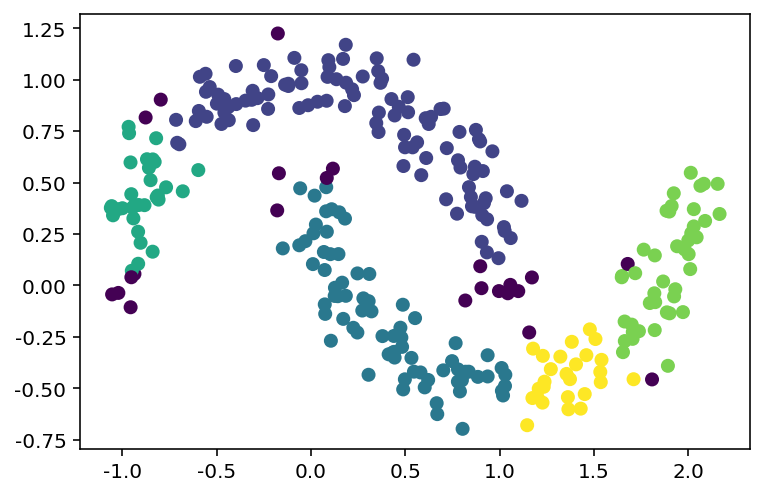

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

# Exercise

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

X = [[0, 1], [1, 1]]
print(euclidean_distances(X, X))
print(euclidean_distances(X, [[0,0]]))
print(cosine_distances(X,X))       # defined as 1 - cos_similarity
print(manhattan_distances(X,[[0,0]]))

[[0. 1.]
 [1. 0.]]
[[1.        ]
 [1.41421356]]
[[0.         0.29289322]
 [0.29289322 0.        ]]
[[1.]
 [2.]]


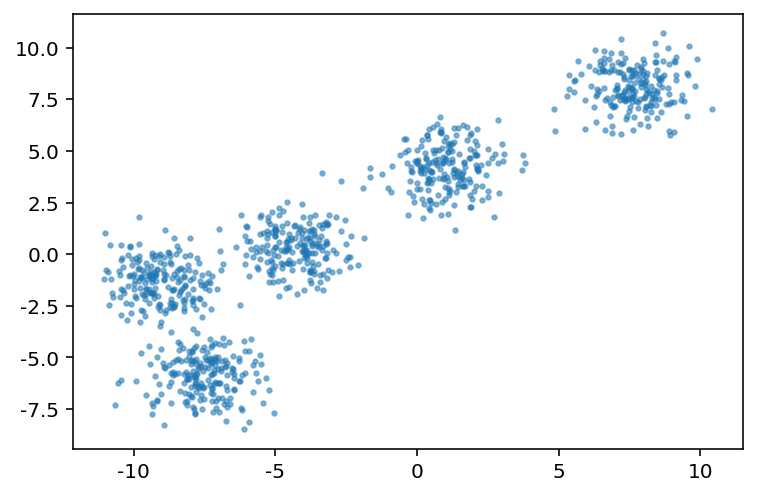

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_features=2, n_samples=1000, centers=5, cluster_std=1, random_state=3)    
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)